In [1]:
import util

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader, random_split
#from torchvision import datasets, models
import torch.nn as nn
from torch.autograd import Variable
#import torch.optim as optim
from sklearn.metrics import confusion_matrix
from torchsampler import ImbalancedDatasetSampler
#from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
transformes = util.get_transform() # Pour modifier les transformations et afin de garantir que ces mêmes transformations soit appliquées lors de l'extraction des bndbox, il faut modifier cette fonction dans util.py

In [3]:
dataset = util.VaidVehiculeDataset('labels.csv', 'bbox_imgs', transformes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


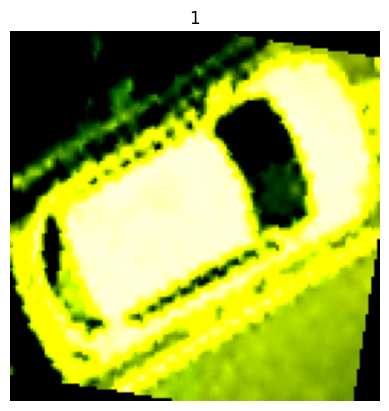

In [4]:
rnd_inds=np.random.randint(0,len(dataset))
img, lab = dataset[rnd_inds]
img.shape
plt.imshow(img.numpy().transpose((1, 2, 0)))
plt.title(lab)
plt.axis('off')
plt.show()

In [5]:
len_img=len(dataset)
len_train=int(0.8*len_img)
len_val=len_img-len_train

train,val = random_split(dataset,
                             [len_train,len_val])

print("train dataset size:", len(train))
print("validation dataset size:", len(val))

train dataset size: 38882
validation dataset size: 9721


In [6]:
train_dl = DataLoader(train,
                      batch_size=32,
                      shuffle=True)

val_dl = DataLoader(val,
                    batch_size=32,
                    shuffle=False)

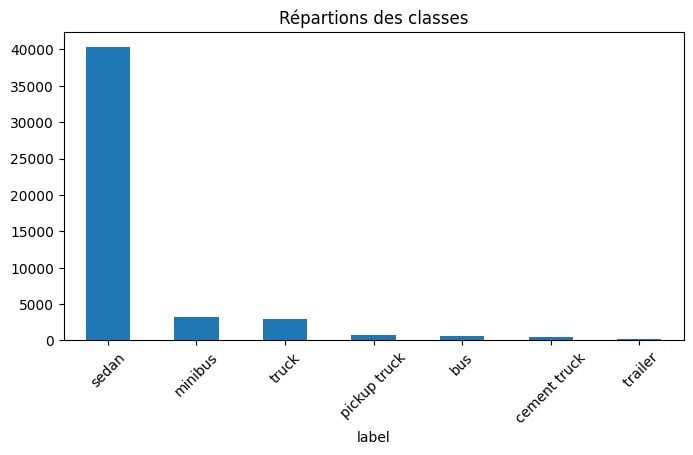

In [7]:
classes = ['sedan' , 'minibus' , 'truck' , 'pickup truck' , 'bus' , 'cement truck' , ' trailer']


plt.figure(figsize= (8,4))
pd.read_csv('labels.csv')['label'].value_counts().plot(kind = "bar");
plt.xticks(np.arange(7), classes, rotation=45)
plt.title('Répartions des classes');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


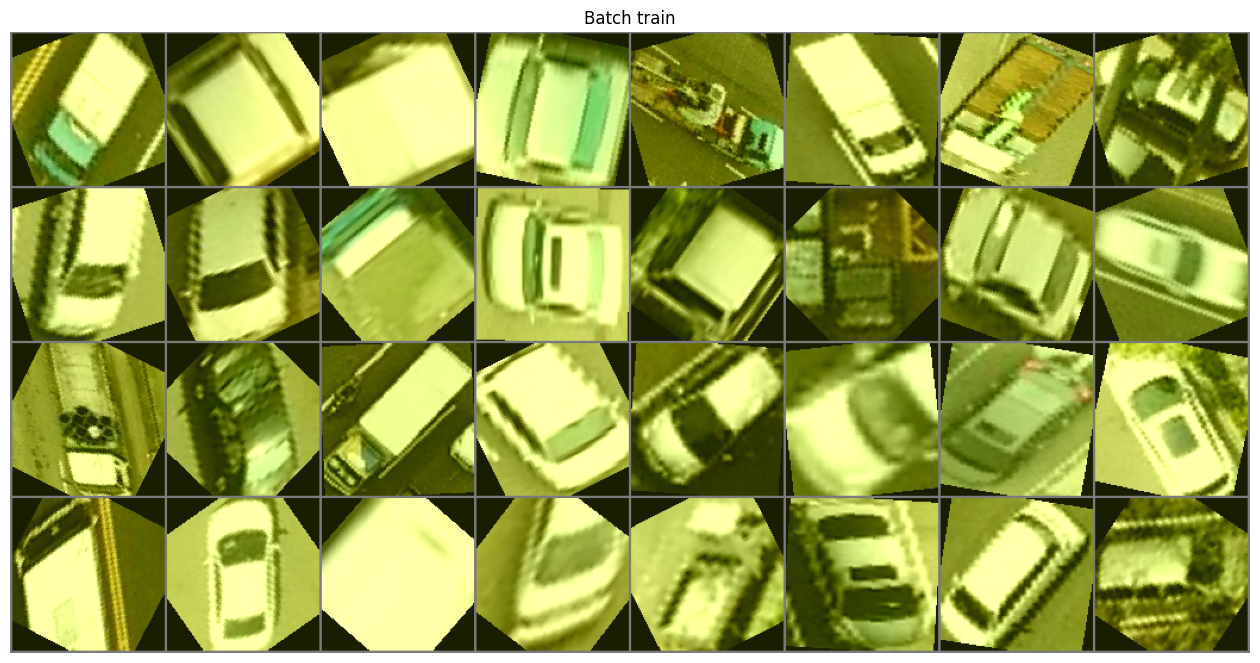

In [8]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

std=torch.Tensor([0.229, 0.224, 0.225])
mean=torch.Tensor([0.485, 0.456, 0.406])

def denorm(img):
    return img*std[0]+mean[0]

def show_batch(loader):
    for img,_ in loader:
        plt.figure(figsize=(16,16))
        plt.imshow(denorm(make_grid(img,8)).permute(1,2,0))
        plt.axis(False);
        plt.title('Batch train')
        break

show_batch(train_dl)

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
num_classes = len(classes)
device = 'cuda'
# Création du modèle
model = util.Classifier(num_classes)
model.to(device)
results = util.classification_train(model, train_dl, val_dl, device)

C:\ProgramData\anaconda3\envs\test2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\test2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 1/20, Accuracy: 91.21%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 2/20, Accuracy: 92.86%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 3/20, Accuracy: 91.46%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 4/20, Accuracy: 94.21%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 5/20, Accuracy: 95.91%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 6/20, Accuracy: 95.62%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 7/20, Accuracy: 97.11%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 8/20, Accuracy: 95.76%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 9/20, Accuracy: 97.16%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 10/20, Accuracy: 97.51%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 11/20, Accuracy: 98.02%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 12/20, Accuracy: 96.53%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 13/20, Accuracy: 97.58%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 14/20, Accuracy: 97.88%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 15/20, Accuracy: 98.45%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 16/20, Accuracy: 98.19%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 17/20, Accuracy: 98.04%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 18/20, Accuracy: 98.34%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 19/20, Accuracy: 98.57%


  0%|          | 0/1216 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

Epoch 20/20, Accuracy: 98.10%


In [11]:
results

,train_Loss,val_Loss,train_Accuracy,val_Accuracy
0,"tensor(0.0407, device='cuda:0')","tensor(0.6199, device='cuda:0')",0.884728,0.912149
1,"tensor(0.0025, device='cuda:0')","tensor(0.2795, device='cuda:0')",0.924078,0.928608
2,"tensor(2.0671, device='cuda:0')","tensor(0.2845, device='cuda:0')",0.941130,0.914618
3,"tensor(1.3318, device='cuda:0')","tensor(0.2689, device='cuda:0')",0.950183,0.942084
4,"tensor(0.1452, device='cuda:0')","tensor(0.2266, device='cuda:0')",0.957204,0.959058
5,"tensor(0.0071, device='cuda:0')","tensor(0.2626, device='cuda:0')",0.964817,0.956177
6,"tensor(0.0009, device='cuda:0')","tensor(0.2145, device='cuda:0')",0.966617,0.971094
7,"tensor(2.9501, device='cuda:0')","tensor(0.2119, device='cuda:0')",0.971581,0.957618
8,"tensor(0.0280, device='cuda:0')","tensor(0.3240, device='cuda:0')",0.973201,0.971608
9,"tensor(3.3854e-05, device='cuda:0')","tensor(0.0985, device='cuda:0')",0.977676,0.975105


In [ ]:
np.arange(0,10)

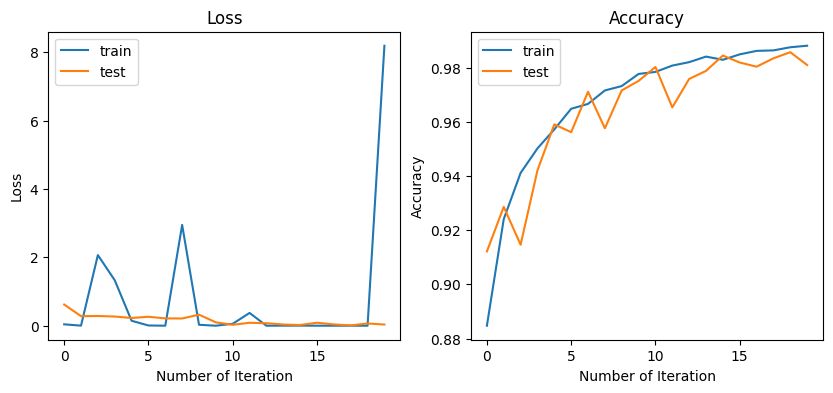

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(len(results)),results['train_Loss'], label = 'train')
plt.plot(np.arange(len(results)),results['val_Loss'], label = 'test')
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(len(results)),results['train_Accuracy'], label = 'train')
plt.plot(np.arange(len(results)),results['val_Accuracy'], label = 'test')
plt.xlabel("Number of Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

plt.show()

In [13]:
device = 'cuda'
def prediction(index, data):
    img, _ = data[index]
    img = img.to(device)
    img = Variable(img.view([-1, 3, 128, 128]))
    outputs = model(img)
    predict = torch.max(outputs.data, 1)[1].to(device)
    
    return predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Predicted Label: 1')

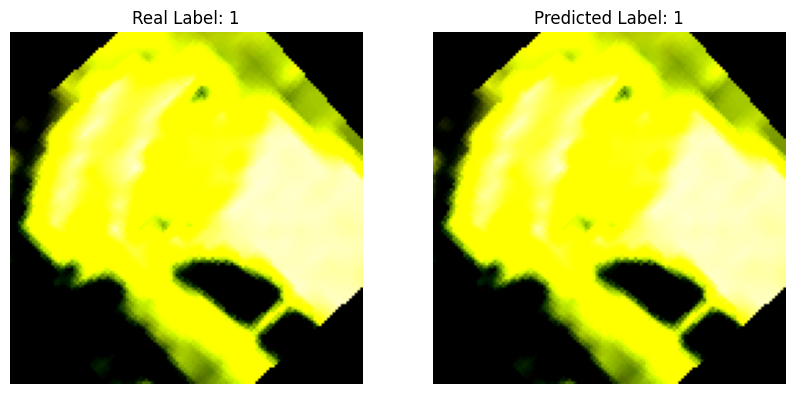

In [46]:
rnd_inds=np.random.randint(0,len(dataset))

fig = plt.figure(figsize=(10, 7))

img, label = dataset[rnd_inds]
predicted_label = prediction(rnd_inds, dataset)

fig.add_subplot(1, 2, 1)
plt.imshow(img.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title("Real Label: " + str(label))

fig.add_subplot(1,2,2)
plt.imshow(img.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title("Predicted Label: " + str(int(predicted_label)+1))


In [15]:
model.eval()

#prédictions du modèle sur le données de test
predictions = []
targets = []
with torch.no_grad():
    for images, labels in val_dl: 
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy() + 1)
        targets.extend(labels.cpu().numpy())

In [16]:
# Convertissez les prédictions et les étiquettes en tableaux numpy
predictions = np.array(predictions)
targets = np.array(targets)

# Créez la matrice de confusion
confusion_mat = confusion_matrix(targets, predictions)

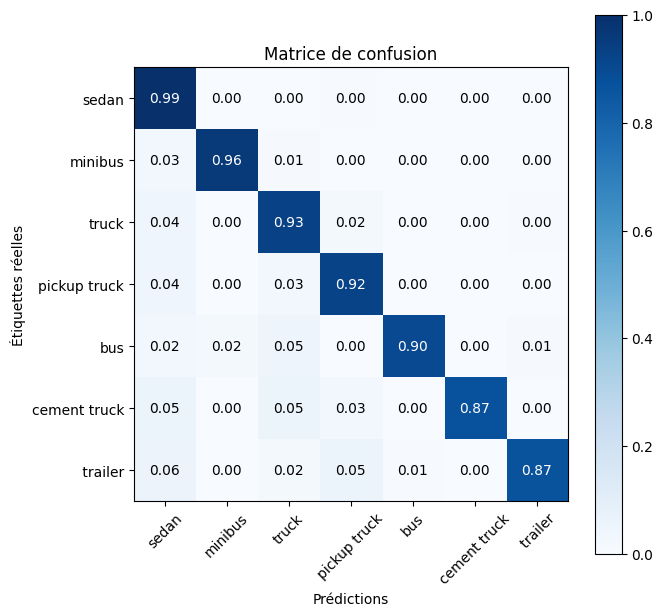

In [17]:
# Affichez la matrice de confusion avec les valeurs
confusion_mat_norm = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]

# Affichez la matrice de confusion normalisée avec les valeurs
plt.figure(figsize=(num_classes, num_classes))
plt.imshow(confusion_mat_norm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)

# Ajoutez les valeurs normalisées dans chaque cellule
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(confusion_mat_norm[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if confusion_mat_norm[i, j] > 0.5 else "black")

# Configurez les autres paramètres de l'axe
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Prédictions")
plt.ylabel("Étiquettes réelles")
plt.title("Matrice de confusion")

plt.show()

In [18]:
torch.save(model.state_dict(),"vaid_classifier.pth")
